In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline 

In [88]:
pf = pd.read_csv('Data/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv', header = 0, parse_dates=['date'])

In [92]:
pf.head()

,station_id,stationname,date,daytype,rides
0,40010,Austin-Forest Park,2001-01-01,U,290
1,40020,Harlem-Lake,2001-01-01,U,633
2,40030,Pulaski-Lake,2001-01-01,U,483
3,40040,Quincy/Wells,2001-01-01,U,374
4,40050,Davis,2001-01-01,U,804


In [93]:
station_names=set(pf['stationname'])
len(station_names)

147

In [94]:
rides_by_station=pf.groupby('stationname').sum()

In [95]:
rides_by_station.head()

,station_id,rides
stationname,,
18th,232404360,6926202
35-Bronzeville-IIT,234096160,10732399
35th/Archer,228443280,12560805
43rd,235156460,4734388
47th-Dan Ryan,233526720,14914595


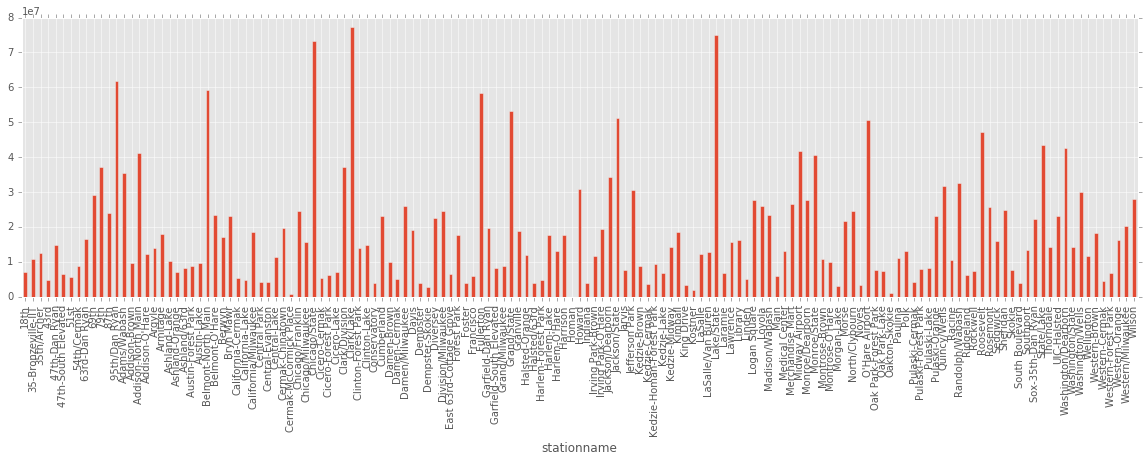

In [96]:
ax=rides_by_station['rides'].plot(kind = 'bar', stacked = True, figsize = (20,5))
fig = ax.get_figure()
fig.savefig('/Users/SamuelChen/chicago_new_location/DataAnalysis/Images/all_rides.png')

In [97]:
rides_by_station.sort_values(by = 'rides', ascending = False).head()

,station_id,rides
stationname,,
Clark/Lake,229842960,77354165
Lake/State,237170380,74890089
Chicago/State,235891950,73393451
95th/Dan Ryan,229189700,61670926
Belmont-North Main,235152120,59193996


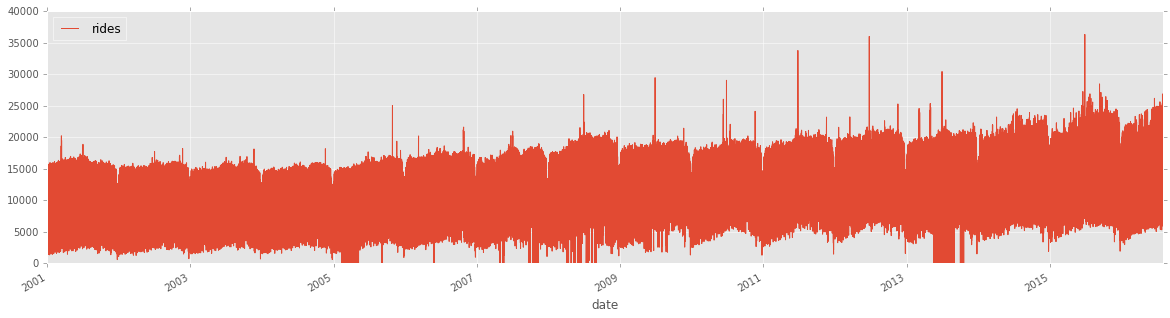

In [98]:
max_rides=pf[pf['stationname'].isin(['Clark/Lake','Lake/State', 'Chicago/State', '95th/Dan Ryan','Belmont-North Main'])]
ax=max_rides.plot(x = 'date', y = 'rides', figsize=(20, 5))

In [99]:
fig = ax.get_figure()
fig.savefig('/Users/SamuelChen/chicago_new_location/DataAnalysis/Images/max_rides.png')

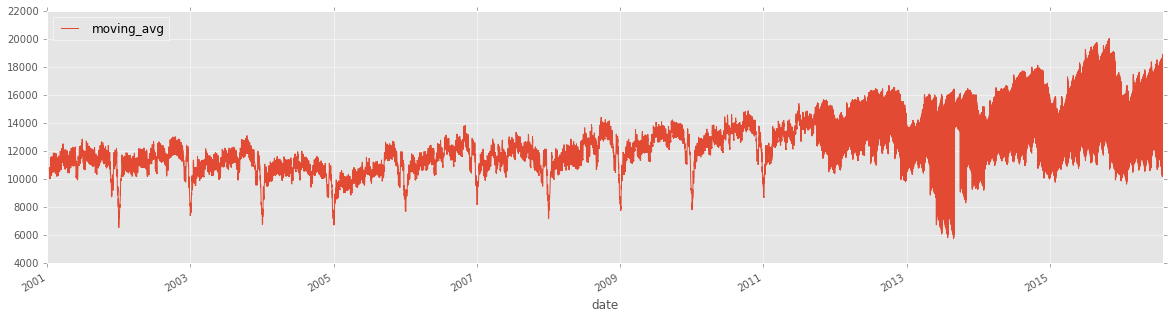

In [101]:
max_rides.loc[:, 'moving_avg']=max_rides['rides'].rolling(window = 60, center = False).mean()
ax=max_rides.plot(x = 'date', y = 'moving_avg', figsize=(20, 5))
fig = ax.get_figure()
fig.savefig('/Users/SamuelChen/chicago_new_location/DataAnalysis/Images/max_rides_ma.png')

In [102]:
rides_by_station.sort_values(by = 'rides', ascending = True).head()

,station_id,rides
stationname,,
Homan,1288980,27
Cermak-McCormick Place,24096820,646644
Oakton-Skokie,65979440,1059747
Kostner,231176400,1847008
Dempster-Skokie,63541620,2615754


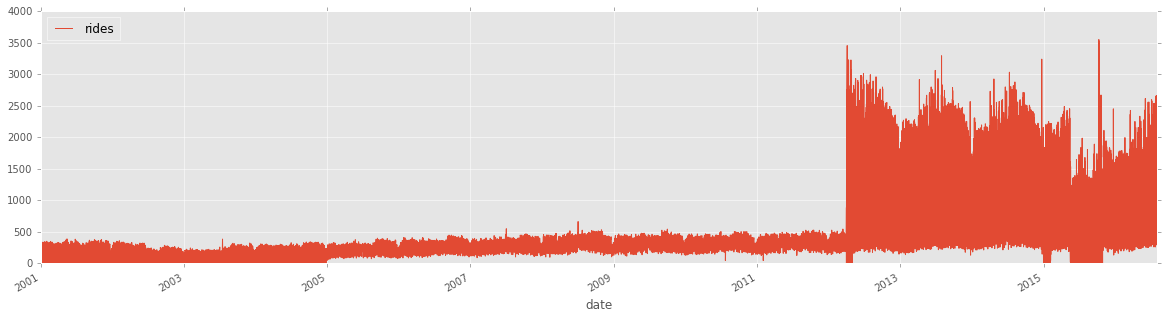

In [103]:
min_rides=pf[pf['stationname'].isin(['Homan','Cermak-McCormick Place', 'Oakton-Skokie', 'Kostner','Dempster-Skokie'])]
ax=min_rides.plot(x = 'date', y = 'rides', figsize=(20, 5))
fig = ax.get_figure()
fig.savefig('/Users/SamuelChen/chicago_new_location/DataAnalysis/Images/min_rides.png')

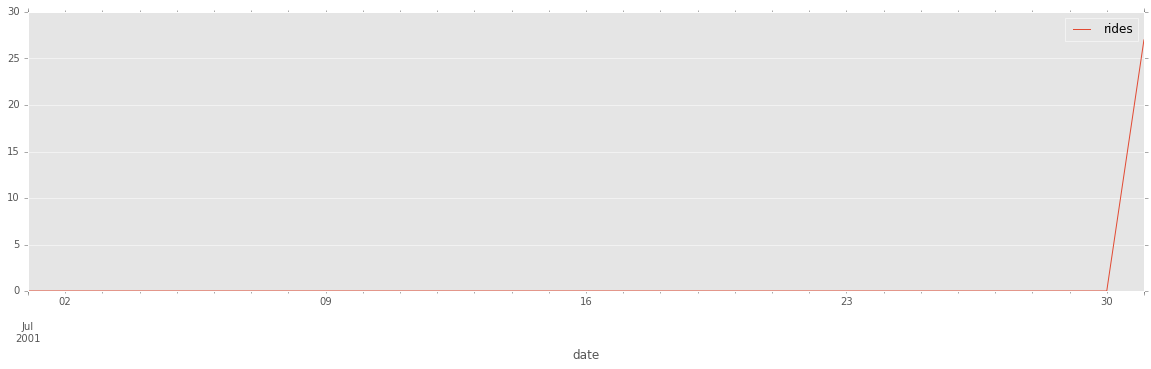

In [104]:
min_rides=pf[pf['stationname'].isin(['Homan'])]
ax=min_rides.plot(x = 'date', y = 'rides', figsize=(20, 5))
fig = ax.get_figure()
fig.savefig('/Users/SamuelChen/chicago_new_location/DataAnalysis/Images/homan_rides.png')

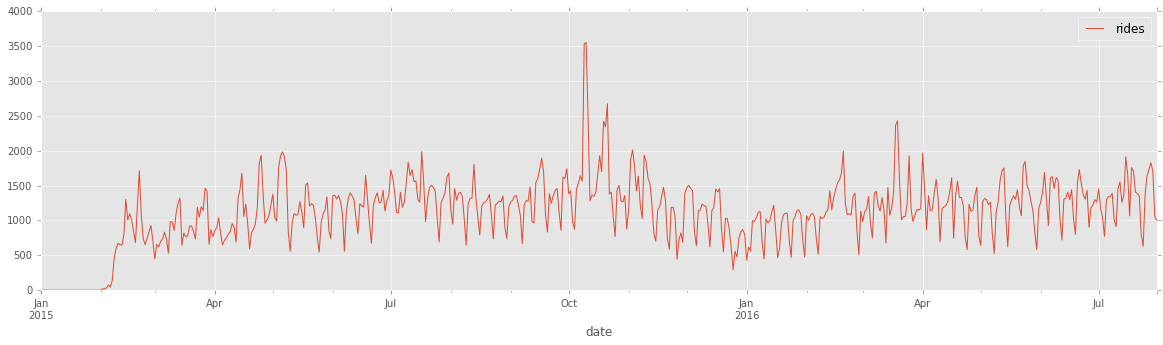

In [105]:
min_rides=pf[pf['stationname'].isin(['Cermak-McCormick Place'])]
ax=min_rides.plot(x = 'date', y = 'rides', figsize=(20, 5))
fig = ax.get_figure()
fig.savefig('/Users/SamuelChen/chicago_new_location/DataAnalysis/Images/cmp_rides.png')

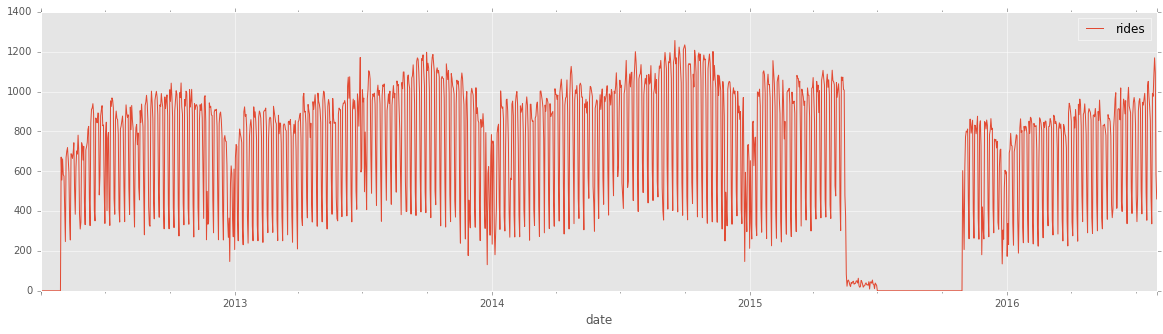

In [106]:
min_rides=pf[pf['stationname'].isin(['Oakton-Skokie'])]
ax=min_rides.plot(x = 'date', y = 'rides', figsize=(20, 5))
fig = ax.get_figure()
fig.savefig('/Users/SamuelChen/chicago_new_location/DataAnalysis/Images/os_rides.png')

In [107]:
rides_by_daytype=pf.groupby('daytype').sum()

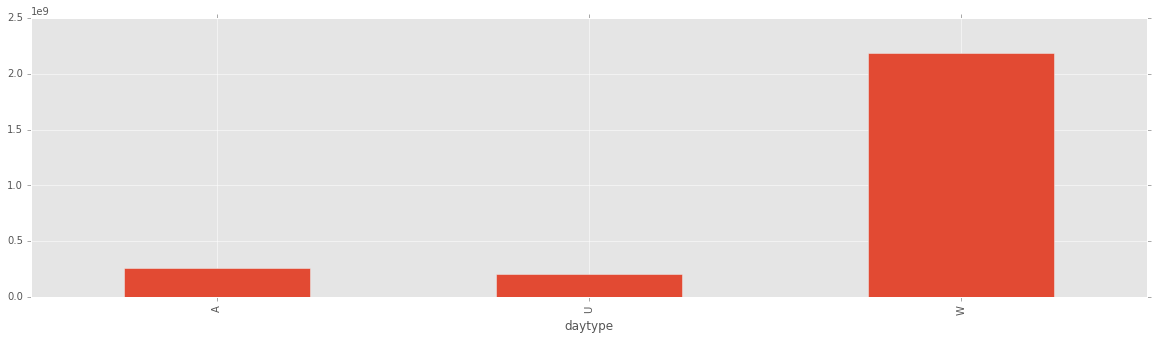

In [108]:
ax=rides_by_daytype['rides'].plot(kind = 'bar', figsize = (20,5))
fig = ax.get_figure()
fig.savefig('/Users/SamuelChen/chicago_new_location/DataAnalysis/Images/daytype_rides.png')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x14416a510>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1484067d0>], dtype=object)

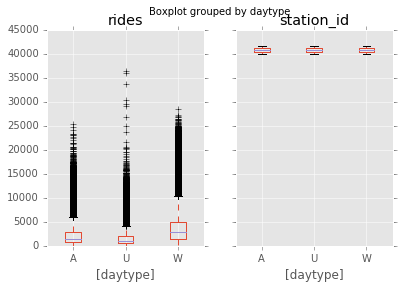

In [109]:
pf.boxplot(by='daytype')

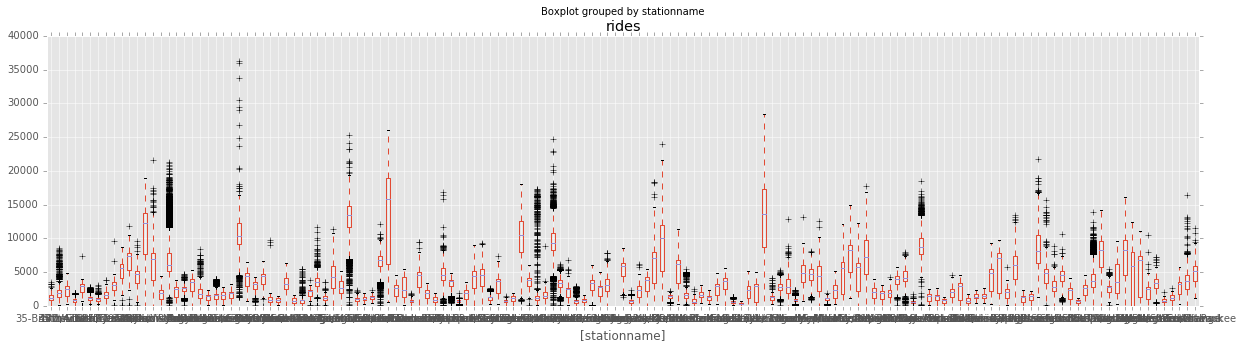

In [110]:
ax=pf[['stationname','rides']].boxplot(by='stationname', figsize=(20,5))
fig = ax.get_figure()
fig.savefig('/Users/SamuelChen/chicago_new_location/DataAnalysis/Images/box_all_rides.png')

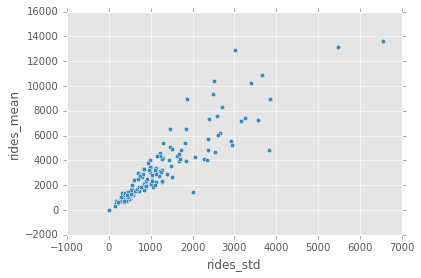

In [111]:
mean_stat=pf[['stationname','rides']].groupby('stationname').mean()
std_stat=pf[['stationname','rides']].groupby('stationname').std()
frames = [mean_stat, std_stat]
ms_pf=pd.concat(frames, axis = 1)
ms_pf.columns=['rides_mean', 'rides_std']
ax = ms_pf.plot.scatter(x = 'rides_std', y = 'rides_mean')
fig = ax.get_figure()
fig.savefig('/Users/SamuelChen/chicago_new_location/DataAnalysis/Images/mean_std_rides.png')

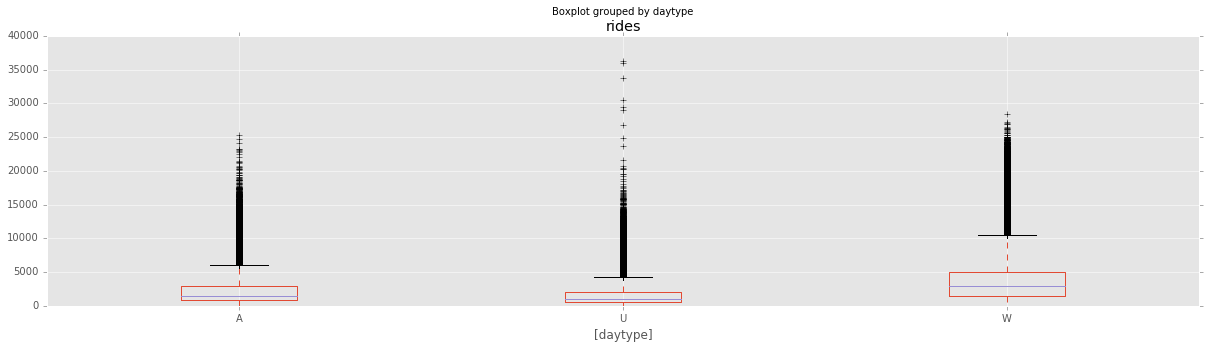

In [112]:
ax=pf[['daytype','rides']].boxplot(by='daytype', figsize=(20,5))
fig = ax.get_figure()
fig.savefig('/Users/SamuelChen/chicago_new_location/DataAnalysis/Images/box_daytype_rides.png')

In [113]:
df1=pf[['stationname','daytype', 'rides']].groupby(['stationname', 'daytype']).sum()
df2=df1.unstack()

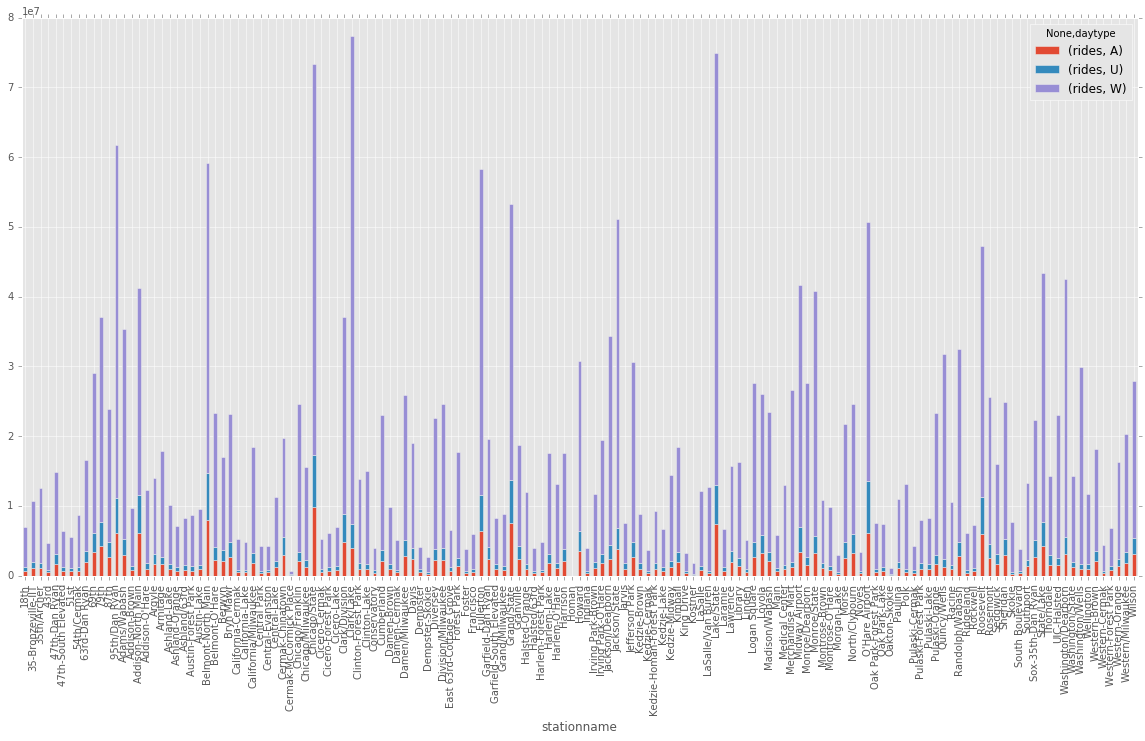

In [126]:
ax=df2.plot.bar(stacked=True, figsize = (20, 10))
fig = ax.get_figure()
fig.savefig('/Users/SamuelChen/chicago_new_location/DataAnalysis/Images/stacked_daytype_rides.png')

In [115]:
pf.head()

,station_id,stationname,date,daytype,rides
0,40010,Austin-Forest Park,2001-01-01,U,290
1,40020,Harlem-Lake,2001-01-01,U,633
2,40030,Pulaski-Lake,2001-01-01,U,483
3,40040,Quincy/Wells,2001-01-01,U,374
4,40050,Davis,2001-01-01,U,804


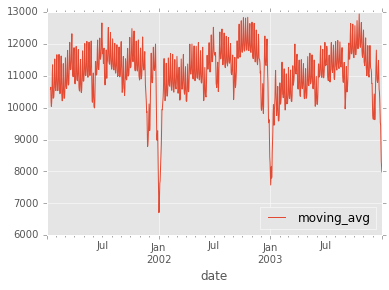

In [122]:
df=max_rides[max_rides['stationname'] == 'Clark/Lake']
ax=df[(df['date'] > '2001-1-1') & (df['date'] <= '2003-12-31')].plot(x = 'date', y = 'moving_avg')
fig = ax.get_figure()
fig.savefig('/Users/SamuelChen/chicago_new_location/DataAnalysis/Images/cl_head_ma.png')